<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220806_NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **나이브 베이즈 알고리즘 활용 실습**

### 가우시안 나이브 베이즈 분류

#### **라이브러리 import**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### **데이터 획득 및 탐색**

In [ ]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

####**데이터 시각화**

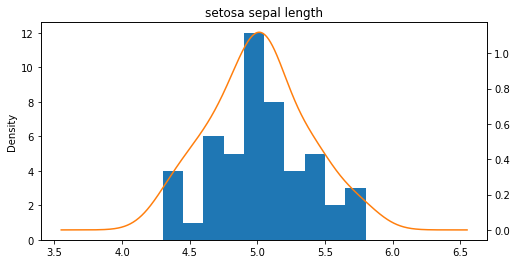

In [ ]:
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica" ]

ax = setosa_df["sepal length (cm)"].plot(kind='hist')
setosa_df["sepal length (cm)"].plot(kind='kde',
                                    ax = ax, 
                                    secondary_y = True,          # 이걸 False로 하면 오른쪽 y축 없이 왼쪽 y축 기준으로 그래프가 만들어짐
                                    title='setosa sepal length',
                                    figsize = (8,4))

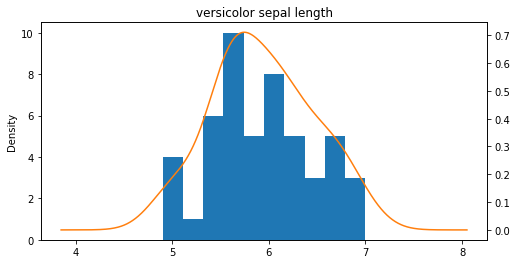

In [ ]:
ax = versicolor_df["sepal length (cm)"].plot(kind='hist')
versicolor_df["sepal length (cm)"].plot(kind='kde',
                                    ax = ax, 
                                    secondary_y = True,
                                    title='versicolor sepal length',
                                    figsize = (8,4))

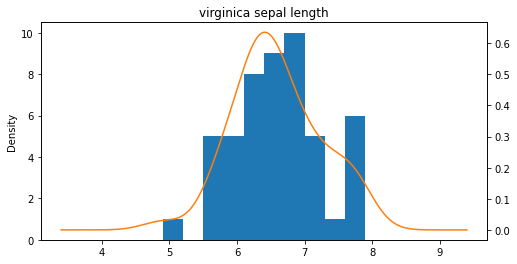

In [ ]:
ax = virginica_df["sepal length (cm)"].plot(kind='hist')
virginica_df["sepal length (cm)"].plot(kind='kde',
                                    ax = ax, 
                                    secondary_y = True,
                                    title='virginica sepal length',
                                    figsize = (8,4))

####**가우시안 나이브 베이즈 분류하기**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

model = GaussianNB()
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(accuracy_score(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667



####**혼동행렬 확인하기**



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
